# <center>Wine Quality Case Study</center>

> **In this case study, we will be analyzing two data sets: 1 on red wine samples and 1 on white wine samles from the north of Portugal**

- ***The two datasets are relaterd to*** **red and white** ***variantes of the Portuguese*** **"Vinho Verde"** ***wine.***

> **Attribute Information**

Input variables (based on physicochemical tests):

- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol
Output variable (based on sensory data):

- 12 - quality (score between 0 and 10)

> **Asking Questions**

Based on the data set, we have come up with these questions that we would like to answer in our analysis.

- Is a certain type of wine (red or white) associated with higher quality?
- Do wines with higher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?
- What level of acidity is associated with the highest quality?

### Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
red = pd.read_csv('./data/red.csv', sep=';')
white = pd.read_csv('./data/white.csv', sep=';')

In [3]:
# Number of samples and columns in each dataset
red.shape, white.shape

((1599, 12), (4898, 12))

In [4]:
# Features with missing values
red.info(), white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

(None, None)

In [5]:
# Duplicate rows in the white wine dataset
white.duplicated().sum()

937

In [6]:
# Duplicate rows in the red wine dataset
red.duplicated().sum()

240

In [7]:
# We are going to drop the duplicates of each dataser
red = red.drop_duplicates()
white = white.drop_duplicates()

In [8]:
# Number of unique values for quality in each dataset
red['quality'].nunique(), white['quality'].nunique()

(6, 7)

In [9]:
# Mean density of the red wine dataset
red['density'].mean()

0.9967089477557026

### Appending Data

In [10]:
# We create color array for red dataset
color_red = np.repeat('red', red.shape[0])
# Color array for white dataset
color_white = np.repeat('white', white.shape[0])

**We have added arrays to the red and white dataframe. We do this by setting a new column called "color" to the appropriate array.**

In [11]:
# Add red array to the red dataset
red['color'] = color_red
# White dataset
white['color'] = color_white

In [12]:
# We are going to combine the dataframes with append
wine_df = red.append(white)
wine_df.columns = [c.replace(" ", "_") for c in wine_df.columns]
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


### EDA

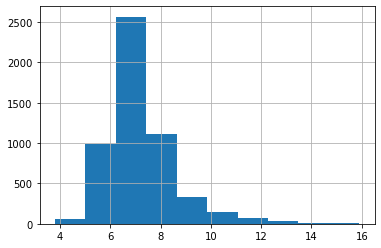

In [14]:
# Histogram for varios features
# fixed acidity
wine_df['fixed_acidity'].hist();

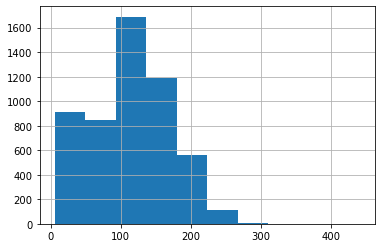

In [15]:
# Total sulfur dioxide
wine_df['total_sulfur_dioxide'].hist();

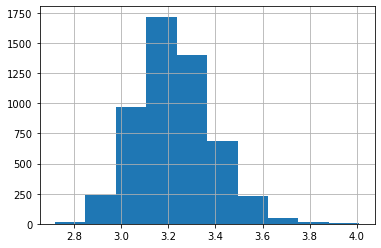

In [16]:
# pH
wine_df['pH'].hist();

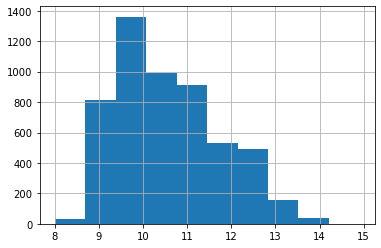

In [17]:
# Alcohol
wine_df['alcohol'].hist();

**Observation:**
- Based on histograms, **Fixed Acidity** and **Alcohol** variables appear skewed to the right.
- This means that there are some outliers on the right side of the distribution (i.e. some outliers with large numerical values). The effect is that these outliers, literally "extreme observations", will "drag" the mean/average up (so that it will be less representative of the data as a whole).

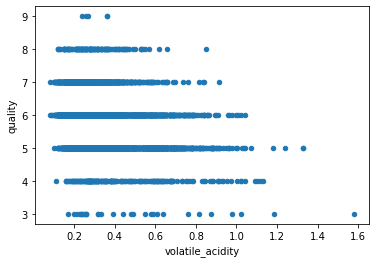

In [18]:
# Scatterplots
# Which one is most likely to have a positive impact on quality
# Volatile acidity
wine_df.plot(y='quality', x='volatile_acidity', kind='scatter');

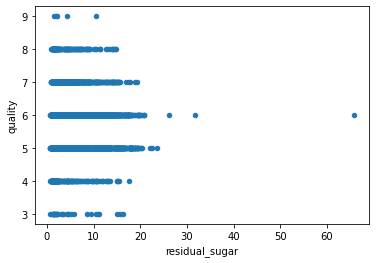

In [19]:
# Residula sugar
wine_df.plot(y='quality', x='residual_sugar', kind="scatter");

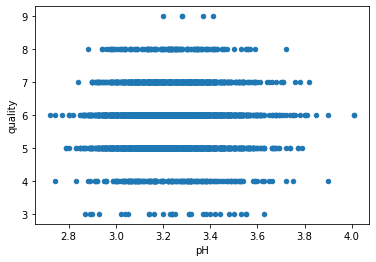

In [20]:
# pH
wine_df.plot(y='quality', x="pH", kind="scatter");

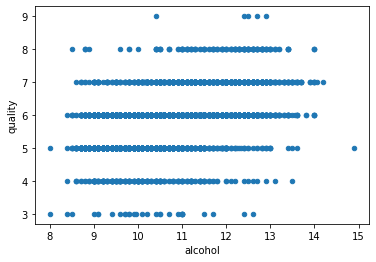

In [21]:
# Alcohol
wine_df.plot(y='quality', x='alcohol', kind='scatter');

**Observation:**
- Based on scatterplots of quality against different feature variables, **Alcohol** is most likely to have a positive impact on quality.
- we are looking for a **positive correlation and high value of correlation coefficient**. Alcohol has a positve correlation and highest among all the positive correlation scatterplots. The higher the alcohol content, the higher the quality.

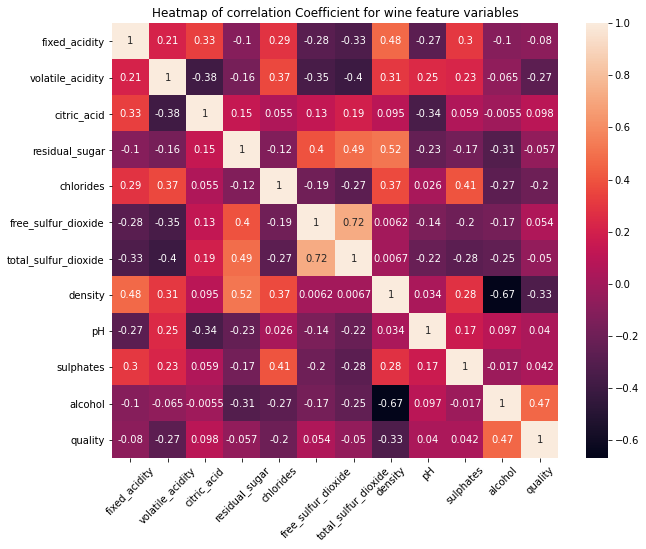

In [22]:
# Heatmap for feature variables
corr = wine_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title('Heatmap of correlation Coefficient for wine feature variables', size=12)
plt.show()

**Observation:**
- Referring to the bottom row of Quality, the feature variable with the most positive impact on Quality is **Alcohol** at 0.47 coefficient. The other features such as **Volatile Acidity, Residual Sugar and pH** have negative or less than 0.1 correlation.

### Conclusions Using Groupby

#### 1 Is a certain type of wine associated with higher quality?

- For this question, we compare the average quality of red wine with the average quality of white wine with groupby. To do this, group by color and then find the mean quality of each group.

In [23]:
# Find the mean quality of each wine type
wine_df.groupby('color')['quality'].mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

**Answer:**
- White wine is typically associated with higher quality at 5.877.

#### 2 What level of acidity receives the highest average rating?

First, we create a new column called 'acidity_levels' with these categories:

Acidity Levels:

- High: Lowest 25% of pH values
- Moderately High: 25% - 50% of pH values
- Medium: 50% - 75% of pH values
- Low: 75% - max pH value

Here, the data is being split at the 25th, 50th, and 75th percentile.

In [24]:
# View the pH values
wine_df['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [25]:
# Bin edges that will be used to 'cut' the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.33, 4.01]
# Labels for the four acidity level groups
bin_names = ['high', 'moderqtely high', 'medium', 'low']
# Creates acidity levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bins=bin_edges, labels=bin_names)
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderqtely high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderqtely high
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [26]:
# Find the mean quaity of each acidity level with groupby
wine_df.groupby('acidity_levels')['quality'].mean()

acidity_levels
high               5.728024
moderqtely high    5.766917
medium             5.852624
low                5.834254
Name: quality, dtype: float64

**Answer:**
- Wine is medium acidity level/pH recivies the highest average rating, followed closely by low acidity level. We can conclude that medium/lower the acidity level, the higher the quality of wine.

### 3 Do wines with higher alcoholic content recieve better ratings?

- Low alcholo (samples with an alcohol content less than the median)
- High alcohol (samples with an alcohol greater than or equal to the median)

In [27]:
# Get the median amount of alcohol content
wine_df['alcohol'].median()

10.4

In [29]:
# Select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.4')

# Select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.4')

# Ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [30]:
# Get mean quality rating for the low alcohol group
low_alcohol['quality'].mean()

5.439202148062908

In [31]:
# Get mean quality rating to the high alcohol group
high_alcohol['quality'].mean()

6.138223368964246

**Answer:**
- Wines with higher alcohol content receives better ratings.

### Do sweeter wines receive better ratings?

In [32]:
# Get the median amount of residual sugar
wine_df['residual_sugar'].median()

2.7

In [33]:
# Select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 2.7')

# Select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 2.7')

# Ensure these queries included each sample exaclty once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [34]:
# Get mean quality rating for the low sugar group
low_sugar['quality'].mean()

5.78316032295271

In [35]:
# Get mean quality rating for the high sugar group
high_sugar['quality'].mean()

5.807649871276205

**Answer:**
- Sweeter wines with higher sugar content receives higher rating although there is a close match with lower sugar content.

### Visualization

### 3.1 Do wines with higher alcoholic content recieve better ratings?

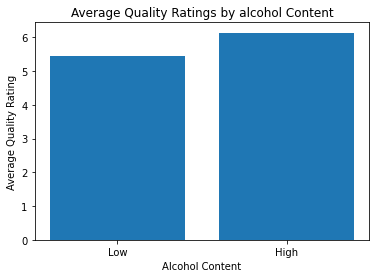

In [36]:
# Get overall median for alcohol
median = wine_df['alcohol'].median()
# Get subsets for data with < and >= alcohol median
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))
# Get mean for quality with low and high alcohol
mean_quality_low_al = low['quality'].mean()
mean_quality_high_al = high['quality'].mean()
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low_al, mean_quality_high_al]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')
plt.show()

**Answer:**
- From the bar chart above, wines with higher alcohol content receives a higher quality rating.

### Do sweeter wines receive higher ratings?

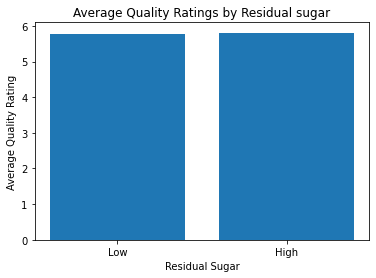

In [37]:
# Get the median for residual sugar
median = wine_df['residual_sugar'].median()
# Get the subsets for < and >= median
low_sugar = wine_df.query('residual_sugar < {}'.format(median))
high_sugar = wine_df.query('residual_sugar >= {}'.format(median))
# Get the mean for quality
mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()
# Create a bar chart
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating')
plt.show()

**Answer:**
- From the above bar chart, it's difficult to properly determine the impact of residual sugar on the quality rating.

### What level of acidity receives the highest average rating?

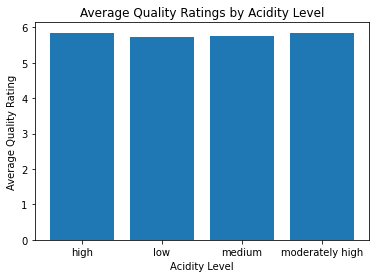

In [38]:
# Mean quality for each acidity level
acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()
acidity_level_mean
# Create a bar chart with proper labels
locations = [2, 3, 4, 1]
heights = acidity_level_mean
labels = ['low', 'medium', 'moderately high', 'high']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating')
plt.show()

**Answer:**
- Similarly, the above bar is also not able to provide any meaningful answer as to which level of acidity provides a lower or higher quality rating.

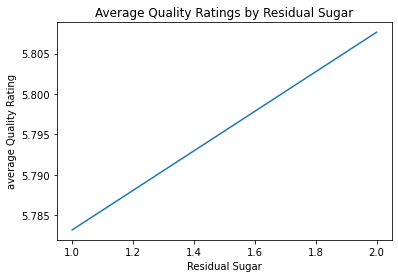

In [41]:
# Create a line with proper labels
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('average Quality Rating')
plt.show()

**Answer:**
- With the line chart above, we can see the relationship between residual sugar and quality rating better. ***The higher the residual sugar, the higher the quality rating.***

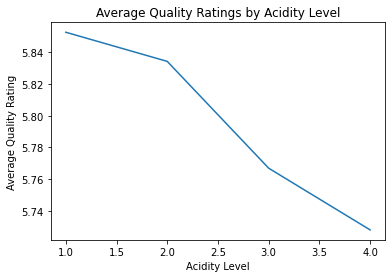

In [44]:
locations = [1, 2, 3, 4]
heights = [5.852624, 5.834254, 5.766917, 5.728024]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating')
plt.show()

**Answer:**
- We can see the higher the acidity level or pH, the lower the quality rating of the wine.

## Conclusion

**1. Is a certain type of wine (red or white) associated with higher quality?**
> White wine is typically associated with higher quality.

**2. Do wines with higher alcoholic content recieve better ratings?**
> Wines with higer alcohol content generally receives better quality ratings.

**3. Do sweeter wines (more residual sugar) receive better ratings?**
> Sweeter wines with higher sugar content receives higher rating although there is close match with lower sugar content.

**4. What level of acidity is associated with the highest quality?**
> Wine with medium acidity level/pH receives the highest average rating, followed closely by lower acidity level. We can conclude the medium/lower the acidity level, the higher the quality of wine.